In [32]:
import glob
import os
import re
from datetime import datetime
import pandas as pd
import h5py
import json
import numpy as np
from PIL import Image
from tqdm import tqdm

from scipy.stats import entropy
from skimage.filters import sobel
import cv2
import numpy as np
from scipy import stats
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops
from pathlib import Path

from MirrorFeatureExtractor.tools import extract_polygon_region_cv2

import matplotlib.pyplot as plt

from MirrorExtractor.mirror_extractor import MirrorExtractor
from MirrorFeatureExtractor.mirror_feature_extractor import MirrorFeatureExtractor

In [46]:
def get_texture_feat(gray_img):
    feat_extractor = MirrorFeatureExtractor()
    gray_norm = cv2.normalize(gray_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    feat_dict = feat_extractor.extract_texture_features(gray_norm)
    return feat_dict

def get_edge_gradient_feat(gray_img):
    feat_extractor = MirrorFeatureExtractor()
    gray_norm = cv2.normalize(gray_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    feat_dict = feat_extractor.extract_edge_and_gradient_features(gray_norm)
    return feat_dict

In [21]:
! ls /home/pgliwny/Praca/Computer_vision_for_MAGIC/data/

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
IR_cam_check_plots
crossings_points.pkl
crossings_points_IRCamM1T20250702_161000M.pkl
data
downolad_images.sh
grid_to_mirror.txt
images_description.txt
images_for_long_term_study
mirrors_dataset.h5
points_IRCam.json
webcam_useful_image
webcam_useful_images-20251017T172853Z-1-001.zip


In [30]:
img_list = sorted(glob.glob("/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/images_for_long_term_study/*.jpg"))
img_list[:3]

['/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/images_for_long_term_study/IRCamM1T20250620_085000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/images_for_long_term_study/IRCamM1T20250620_124000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/images_for_long_term_study/IRCamM1T20250620_184000M.jpg']

In [13]:
BASE_DIR = "/home/pgliwny/Praca/Computer_vision_for_MAGIC/"
mirror_points_path = os.path.join(BASE_DIR, "data/points_IRCam.json")
img_path = os.path.join(BASE_DIR, "data/data/2025/12/15/IRCamM1T20251215_122547M.jpg")

with open(mirror_points_path, 'r') as f:
    data = json.load(f)

def get_point_coords(mirror_id):
    return data['mirror_ids'][f'id_{mirror_id:03d}']

In [14]:
points = get_point_coords(72)

for img_path in tqdm(img_list):
    img = Image.open(img_path)
    crop = extract_polygon_region_cv2(np.array(img), np.array(points))
    get_texture_feat(crop)

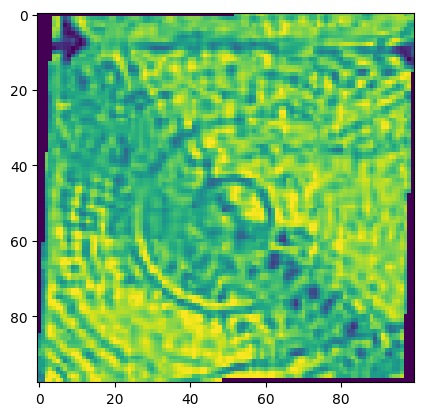

In [11]:
plt.imshow(crop)
plt.show()

In [17]:
get_texture_feat(crop)

{'lbp_mean': np.float64(4.704897959183674),
 'lbp_std': np.float64(2.6323064476777076),
 'lbp_entropy': np.float64(3.2461359655273965),
 'glcm_contrast': np.float64(1118.223459080602),
 'glcm_dissimilarity': np.float64(21.326118326118323),
 'glcm_homogeneity': np.float64(0.08515421530854422),
 'glcm_energy': np.float64(0.03166561441240556),
 'glcm_correlation': np.float64(0.7873198554844923)}

In [40]:
! ls /home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
20  27	29


  5%|▌         | 2/40 [00:00<00:02, 14.98it/s]

IRCamM1T20250620_102000M
IRCamM1T20250620_103000M
IRCamM1T20250620_104000M
IRCamM1T20250620_105000M


 15%|█▌        | 6/40 [00:00<00:02, 15.36it/s]

IRCamM1T20250620_110000M
IRCamM1T20250620_111000M
IRCamM1T20250620_112000M
IRCamM1T20250620_113000M


 25%|██▌       | 10/40 [00:00<00:01, 16.85it/s]

IRCamM1T20250620_114000M
IRCamM1T20250620_115000M
IRCamM1T20250620_120000M
IRCamM1T20250620_121000M


 35%|███▌      | 14/40 [00:00<00:01, 17.37it/s]

IRCamM1T20250620_122000M
IRCamM1T20250620_123000M
IRCamM1T20250620_124000M
IRCamM1T20250620_125000M


 45%|████▌     | 18/40 [00:01<00:01, 15.58it/s]

IRCamM1T20250620_130000M
IRCamM1T20250620_131000M
IRCamM1T20250620_132000M


 55%|█████▌    | 22/40 [00:01<00:01, 15.05it/s]

IRCamM1T20250620_133000M
IRCamM1T20250620_134000M
IRCamM1T20250620_140000M
IRCamM1T20250620_141000M


 65%|██████▌   | 26/40 [00:01<00:00, 15.99it/s]

IRCamM1T20250620_143000M
IRCamM1T20250620_144000M
IRCamM1T20250620_145000M
IRCamM1T20250620_150000M


 70%|███████   | 28/40 [00:01<00:00, 16.73it/s]

IRCamM1T20250620_151000M
IRCamM1T20250620_152000M
IRCamM1T20250620_153000M
IRCamM1T20250620_154000M


 82%|████████▎ | 33/40 [00:02<00:00, 17.52it/s]

IRCamM1T20250620_155000M
IRCamM1T20250620_160000M
IRCamM1T20250620_161000M
IRCamM1T20250620_162000M


 92%|█████████▎| 37/40 [00:02<00:00, 16.70it/s]

IRCamM1T20250620_163000M
IRCamM1T20250620_164000M
IRCamM1T20250620_165000M
IRCamM1T20250620_170000M


100%|██████████| 40/40 [00:02<00:00, 16.32it/s]


IRCamM1T20250620_171000M
=== Drift analysis (linear regression) ===
✓ DRIFT  lbp_mean                   slope/day=+1.2898  R²=0.5623  p=2.56e-08
✓ DRIFT  lbp_std                    slope/day=-0.1000  R²=0.1909  p=4.82e-03
✓ DRIFT  lbp_entropy                slope/day=-0.3409  R²=0.6387  p=6.33e-10
  no drift  glcm_contrast              slope/day=-57.6962  R²=0.0023  p=7.69e-01
✓ DRIFT  glcm_dissimilarity         slope/day=-11.2484  R²=0.5205  p=1.50e-07
✓ DRIFT  glcm_homogeneity           slope/day=+0.5713  R²=0.5753  p=1.43e-08
✓ DRIFT  glcm_energy                slope/day=+0.0409  R²=0.4029  p=1.09e-05
✓ DRIFT  glcm_correlation           slope/day=-0.1829  R²=0.3554  p=4.92e-05


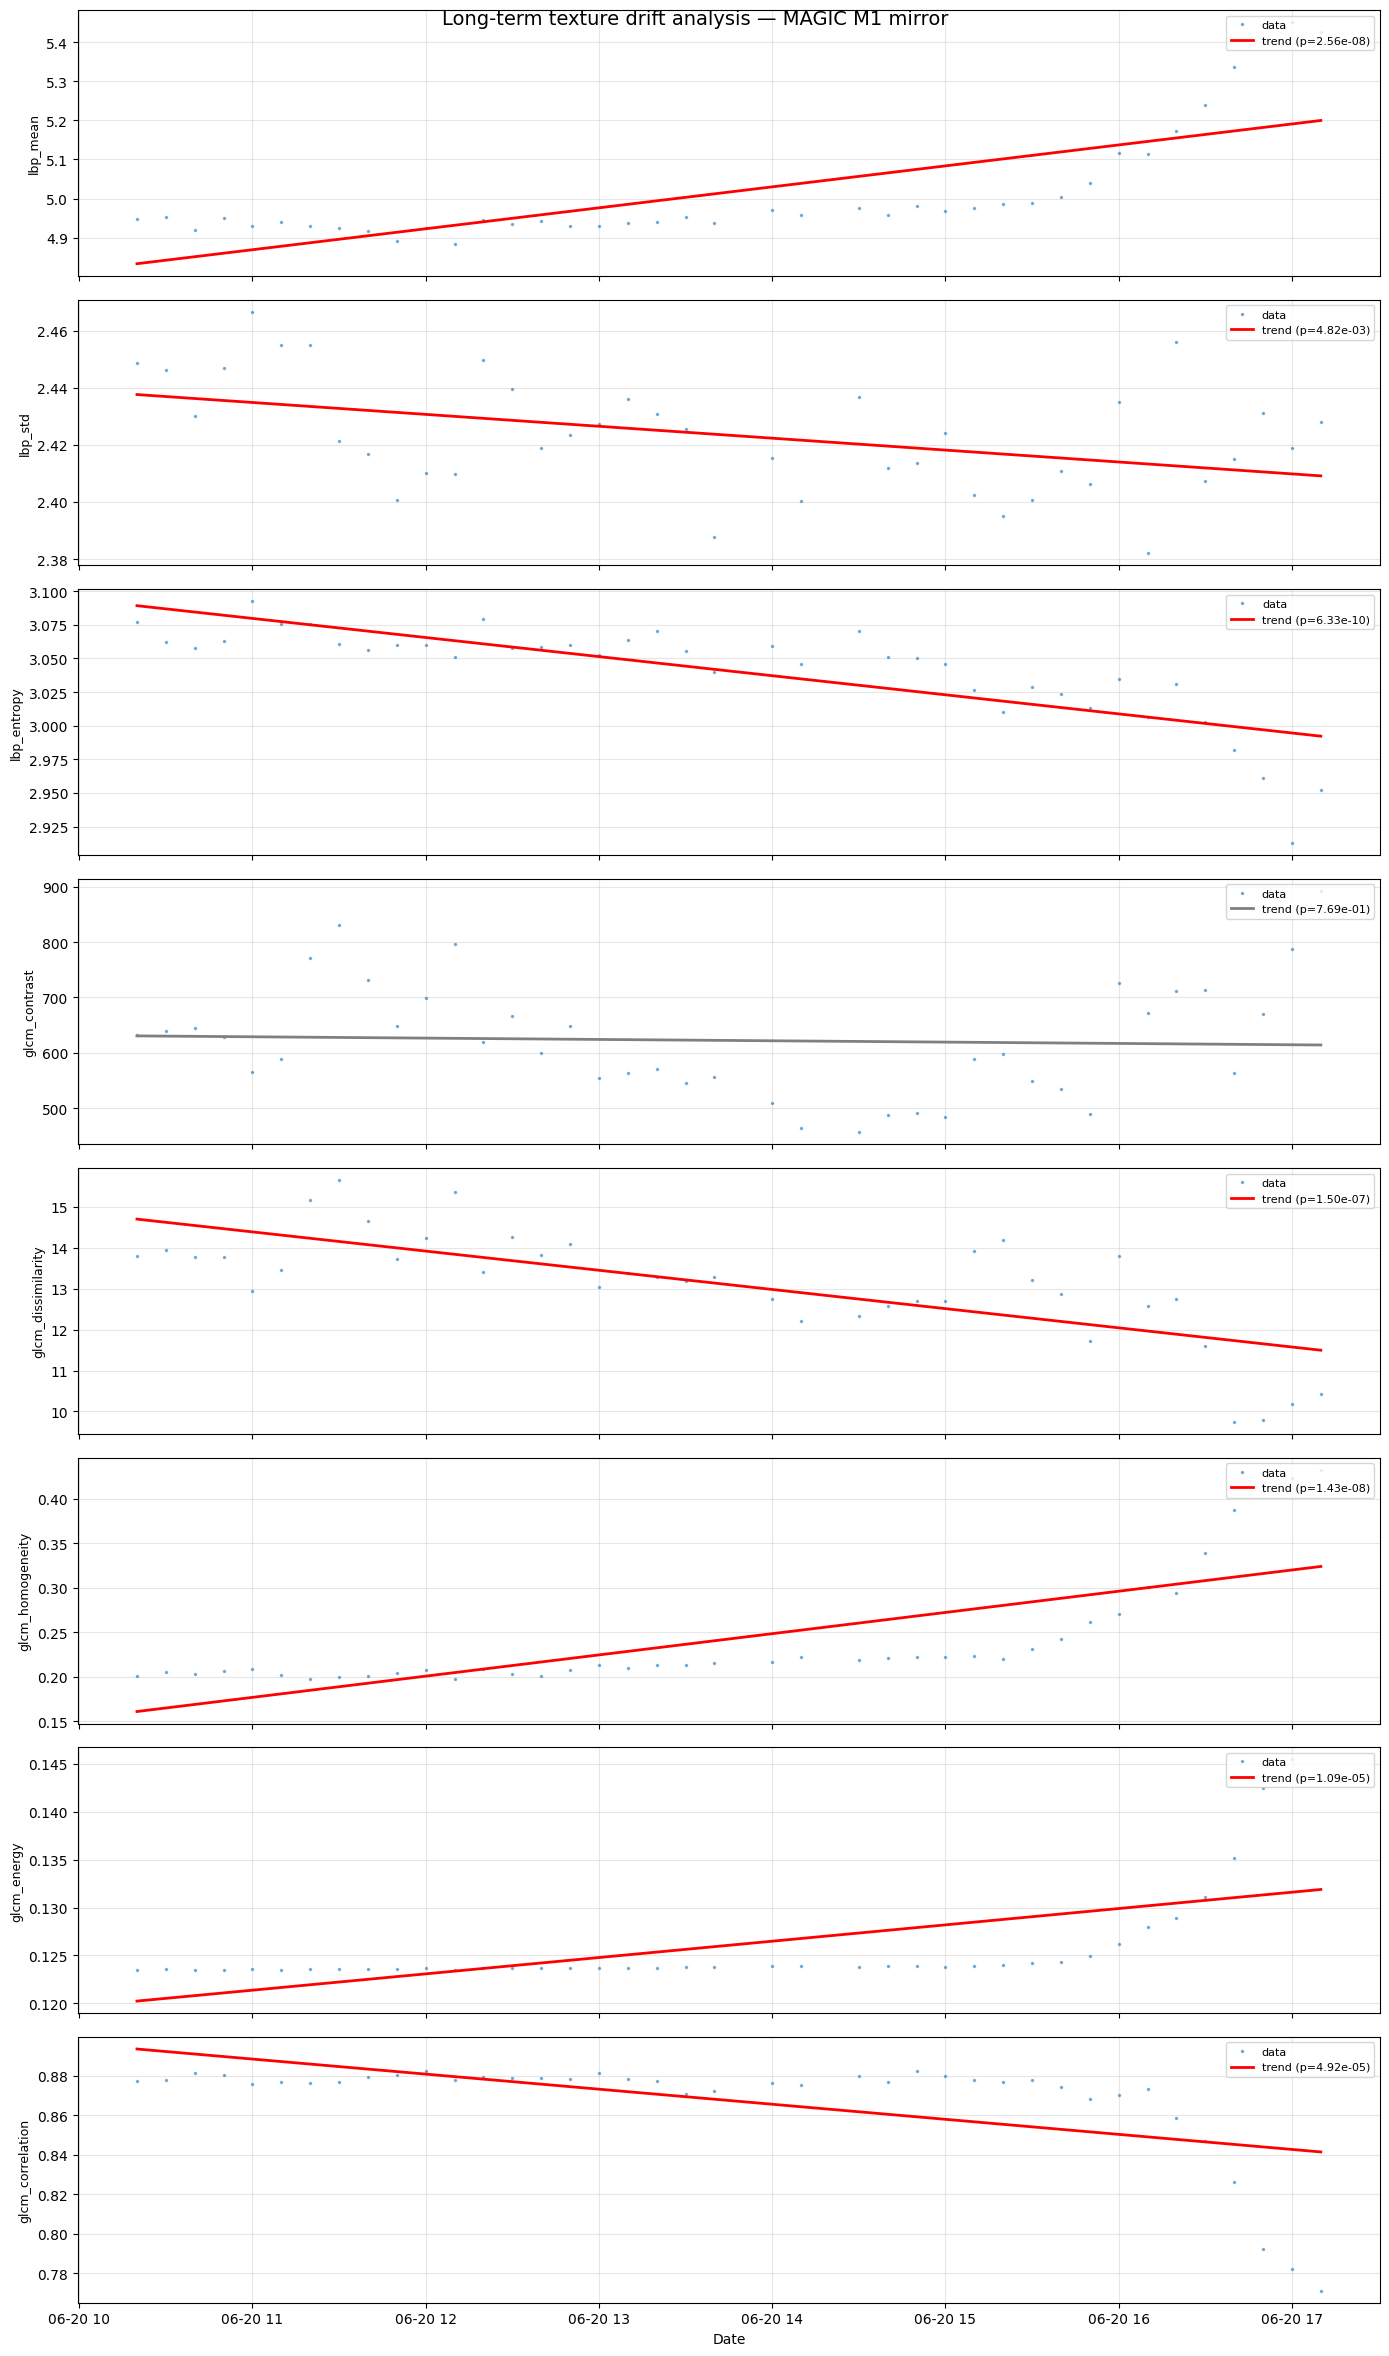

In [45]:
# --- Zbieranie danych ---
img_list = sorted(glob.glob("/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/images_for_long_term_study/*.jpg"))
img_list = sorted(glob.glob("/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06/20/*.jpg"))[20:60]

points = get_point_coords(20)

records = []
for img_path in tqdm(img_list):
    fname = Path(img_path).stem
    print(fname)
    timestamp = datetime.strptime(fname, "IRCamM1T%Y%m%d_%H%M%SM")

    img = Image.open(img_path)
    crop = extract_polygon_region_cv2(np.array(img), np.array(points))
    feat = get_texture_feat(crop)
    feat['timestamp'] = timestamp
    records.append(feat)

df = pd.DataFrame(records)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp').reset_index(drop=True)
df['hours_since_start'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds() / 3600

feature_cols = [c for c in df.columns if c not in ('timestamp', 'hours_since_start')]

# --- Test na dryft: regresja liniowa per cecha ---
print("=== Drift analysis (linear regression) ===")
drift_results = {}
for col in feature_cols:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['hours_since_start'], df[col])
    drift_results[col] = {
        'slope_per_day': slope * 24,
        'r_squared': r_value**2,
        'p_value': p_value,
        'significant': p_value < 0.05
    }
    sig = "✓ DRIFT" if p_value < 0.05 else "  no drift"
    print(f"{sig}  {col:25s}  slope/day={slope*24:+.4f}  R²={r_value**2:.4f}  p={p_value:.2e}")

# --- Wykresy z trendem ---
fig, axes = plt.subplots(len(feature_cols), 1, figsize=(14, 3 * len(feature_cols)), sharex=True)
for ax, col in zip(axes, feature_cols):
    ax.plot(df['timestamp'], df[col], '.', markersize=3, alpha=0.5, label='data')

    # Linia trendu
    slope, intercept, r_value, p_value, _, = stats.linregress(df['hours_since_start'], df[col])
    trend_line = intercept + slope * df['hours_since_start']
    color = 'red' if p_value < 0.05 else 'gray'
    ax.plot(df['timestamp'], trend_line, '-', color=color, linewidth=2,
            label=f'trend (p={p_value:.2e})')

    ax.set_ylabel(col, fontsize=9)
    ax.legend(fontsize=8, loc='upper right')
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel("Date")
fig.suptitle("Long-term texture drift analysis — MAGIC M1 mirror", fontsize=14)
plt.tight_layout()
plt.savefig("drift_analysis.png", dpi=150, bbox_inches='tight')
plt.show()

In [43]:
img_list[20:60]

['/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06/20/IRCamM1T20250620_102000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06/20/IRCamM1T20250620_103000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06/20/IRCamM1T20250620_104000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06/20/IRCamM1T20250620_105000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06/20/IRCamM1T20250620_110000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06/20/IRCamM1T20250620_111000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06/20/IRCamM1T20250620_112000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06/20/IRCamM1T20250620_113000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06/20/IRCamM1T20250620_114000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/06/20/IRCamM1T20250620_115000M.jpg',


In [18]:
def mirror_quality_features(gray):
    """Cechy niezależne od treści odbicia"""
    gray_norm = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # 1. Ostrość krawędzi - defekty są ostre, odbicia rozmyte
    laplacian_var = cv2.Laplacian(gray_norm, cv2.CV_64F).var()
    
    # 2. Wysokie częstotliwości - defekty, nie odbicia
    f = np.fft.fft2(gray_norm)
    fshift = np.fft.fftshift(f)
    h, w = gray.shape
    cy, cx = h // 2, w // 2
    mask = np.zeros((h, w), bool)
    mask[cy-h//6:cy+h//6, cx-w//6:cx+w//6] = True  # niskie freq
    high_freq_ratio = np.sum(np.abs(fshift)[~mask]) / (np.sum(np.abs(fshift)) + 1e-6)
    
    # 3. Lokalna szorstkość (mean filter residual)
    blurred = cv2.blur(gray_norm.astype(float), (5, 5))
    roughness = np.std(gray_norm - blurred)
    
    # 4. Liczba lokalnych "pików" - potencjalne defekty punktowe
    local_max = cv2.dilate(gray_norm, np.ones((3,3), np.uint8))
    peaks = np.sum(gray_norm == local_max) / gray_norm.size
    
    return np.array([
        laplacian_var,     # ostrość
        high_freq_ratio,   # drobne detale
        roughness,         # szorstkość
        peaks              # punktowe anomalie
    ])

In [5]:
def get_dataset_info(h5_path):
    """Wyświetla informacje o datasecie."""
    with h5py.File(h5_path, 'r') as f:
        print(f"Dataset: {h5_path}")
        print(f"Utworzono: {f.attrs.get('created', 'N/A')}")
        print(f"Liczba luster: {f.attrs.get('num_mirrors', 'N/A')}")
        print("-" * 40)

        total_obs = 0
        for mirror_id in range(200):
            grp_path = f'mirrors/{mirror_id:03d}'
            if grp_path in f and 'images' in f[grp_path]:
                n = f[grp_path].attrs.get('num_observations', 0)
                total_obs += n

        print(f"Łączna liczba obserwacji: {total_obs}")

# Get all images of mirror selected by grid_id
def get_mirror_gray(h5_path, grid_id):
    with h5py.File(h5_path, "r") as file:
        print(file.keys())
        img_rgb_grid_id = np.array(file[f"mirrors/{grid_id}/images"])
        gray_images = np.dot(img_rgb_grid_id[..., :3], [0.299, 0.587, 0.114])
    return gray_images

In [20]:
BASE_DIR = "/home/pgliwny/Praca/Computer_vision_for_MAGIC/"
h5_output = os.path.join(BASE_DIR, "data/data/2025/mirrors_dataset_test2.h5")
img_gray_012 = get_mirror_gray(h5_output, "012")
print(img_gray_012.shape)        

<KeysViewHDF5 ['mirrors']>
(27, 83, 101)


In [48]:
with h5py.File(h5_output, "r") as file:
    print(file["mirrors/022"].keys())
    print(file["mirrors/022/source_files"][12])

<KeysViewHDF5 ['images', 'source_files']>
b'IRCamM1T20251130_164000M.jpg'


In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(12, 7))
ax[0].plot(quality_features_array[:, 0])
ax[1].plot(quality_features_array[:, 1])
ax[2].plot(quality_features_array[:, 2])
ax[3].plot(quality_features_array[:, 3])

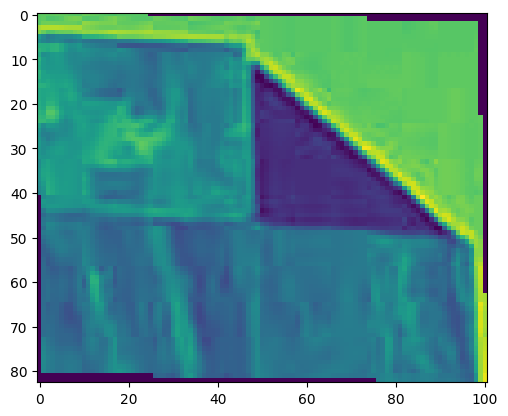

In [37]:
plt.imshow(img_gray_012[8, :, :])

In [34]:
img_gray_022 = get_mirror_gray(h5_output, "022")
print(img_gray_022.shape)        

<KeysViewHDF5 ['mirrors']>
(27, 86, 97)


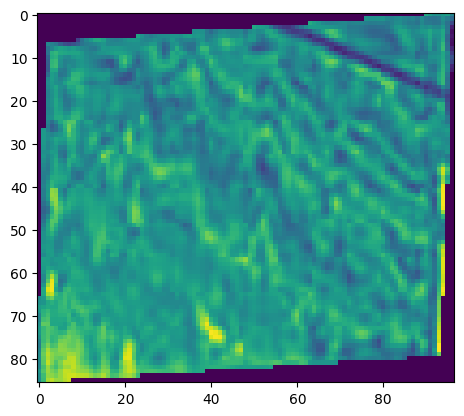

In [41]:
plt.imshow(img_gray_022[6, :, :])

In [38]:
quality_features_array = np.zeros((27, 4))
for i in range(0, 27):
    quality_features_array[i, :] = mirror_quality_features(img_gray_022[i, :, :])

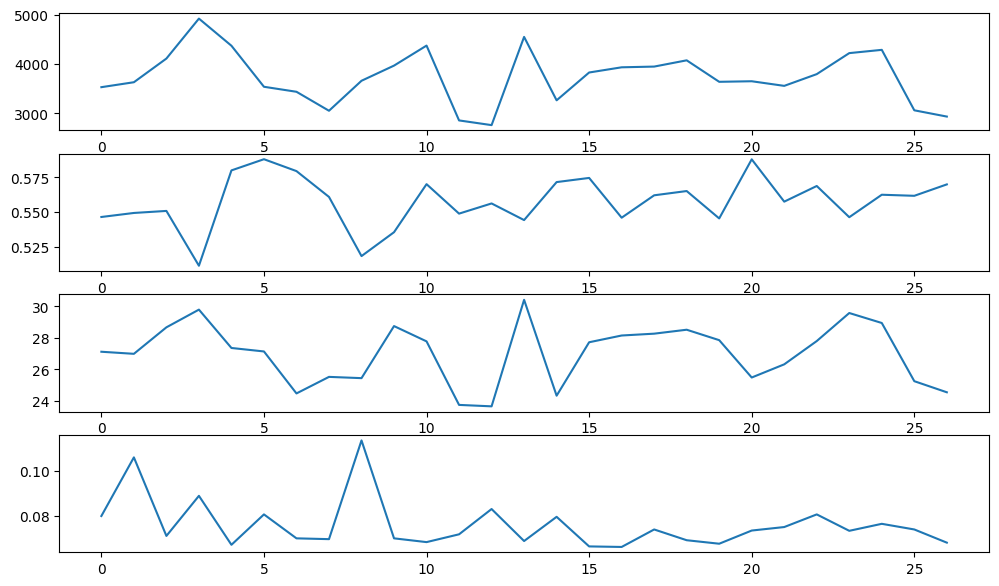

In [33]:
fig, ax = plt.subplots(4, 1, figsize=(12, 7))
ax[0].plot(quality_features_array[:, 0])
ax[1].plot(quality_features_array[:, 1])
ax[2].plot(quality_features_array[:, 2])
ax[3].plot(quality_features_array[:, 3])

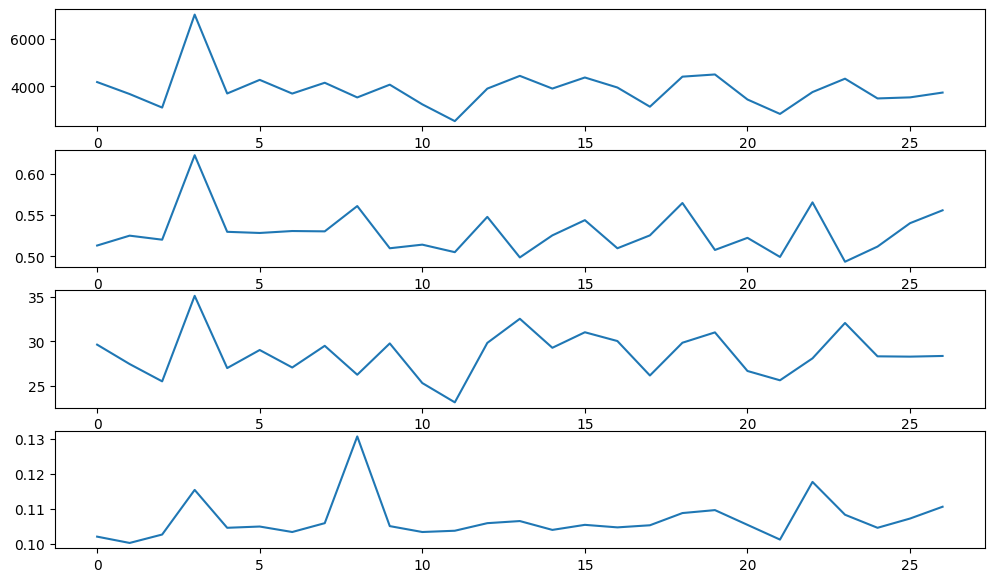

In [39]:
fig, ax = plt.subplots(4, 1, figsize=(12, 7))
ax[0].plot(quality_features_array[:, 0])
ax[1].plot(quality_features_array[:, 1])
ax[2].plot(quality_features_array[:, 2])
ax[3].plot(quality_features_array[:, 3])